# Matichon topic classification: Logistic Regression
* Author: Natchanon Pollertlam
* Date: 2023-11-24

# Table of Contents
1. [Feature engineering](#feature)
2. [Fit model and test](#fitandtest)
3. [Model Evaluation](#eval)
4. [Coefficient Analysis](#coefana)
5. [Error Analysis](#error)

---

## Import Modules
---

In [2]:
# import data preprocessing libraries
import pandas as pd
import numpy as np
from collections import Counter

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score, accuracy_score, precision_score, recall_score

# pickle
import pickle

# tqdm
from tqdm import tqdm
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# matplotlib font
from matplotlib import font_manager

font_path = '../assets/font-lasagna/MN LASAGNA Bold.ttf'  # font path goes here
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = prop.get_name()

## Load Data
---

In [5]:
df = pd.read_json('../data/matichon_cleaned.json')
df

,headline,article,date,category,url,id,tokenized_headline,tokenized_article,tokenized_text,cleaned_tokenized_headline,cleaned_tokenized_article,cleaned_tokenized_text,num_tokens
0,ซาอุฯจ่อเปิดไฟเขียวให้สิทธิหญิงม่าย-หย่าร้างปก...,(2 ธ.ค.58) หนังสือพิมพ์อัล ริยาดของทางการซาอุด...,2015-12-04 03:35:18,foreign,https://www.matichon.co.th/foreign/news_293,293,"[ซาอุฯ, จ่อ, เปิดไฟเขียว, ให้, สิทธิ, หญิง, ม่...","[(, 2, , ธ.ค., 58, ), , หนังสือพิมพ์, อัล, ...","[ซาอุฯ, จ่อ, เปิดไฟเขียว, ให้, สิทธิ, หญิง, ม่...","[ซาอุฯ, จ่อ, เปิดไฟเขียว, สิทธิ, หญิง, ม่าย, ห...","[2, ธ.ค., 58, หนังสือพิมพ์, อัล, ริยาด, ทางการ...","[ซาอุฯ, จ่อ, เปิดไฟเขียว, สิทธิ, หญิง, ม่าย, ห...",103
1,"""ไก่อู""ชี้ ตู่-เต้น ไม่ได้มีหน้าที่ตรวจสอบทุจร...","""บิ๊กป้อม"" แจง ครม. มีความพยายามยุยงปลุกปั่นให...",2015-12-04 04:10:49,politics,https://www.matichon.co.th/politics/news_329,329,"["", ไก่อู, "", ชี้, , ตู่, -, เต้น, , ไม่, ได...","["", บิ๊ก, ป้อม, "", , แจง, , ครม., , มี, ควา...","["", ไก่อู, "", ชี้, , ตู่, -, เต้น, , ไม่, ได...","[ไก่อู, ชี้, ตู่, เต้น, หน้าที่, ตรวจสอบ, ทุจร...","[บิ๊ก, ป้อม, แจง, ครม., ความพยายาม, ยุยง, ปลุก...","[ไก่อู, ชี้, ตู่, เต้น, หน้าที่, ตรวจสอบ, ทุจร...",255
2,"เปิดใจ ""โบว์ แวนดา"" ระหว่างรอยิ้มได้เต็มที่ในว...",แม้จะทำหน้าที่ภรรยาที่ดีมาเฝ้าปอ – ทฤษฎี สหวงษ...,2015-12-04 06:30:11,entertainment,https://www.matichon.co.th/entertainment/news_375,375,"[เปิดใจ, , "", โบว์, , แวนดา, "", , ระหว่าง, ...","[แม้, จะ, ทำหน้าที่, ภรรยา, ที่, ดี, มา, เฝ้า,...","[เปิดใจ, , "", โบว์, , แวนดา, "", , ระหว่าง, ...","[เปิดใจ, โบว์, แวนดา, รอ, ยิ้ม, เต็มที่, วันที...","[ทำหน้าที่, ภรรยา, ดี, เฝ้า, ปอ, ทฤษฎี, สห, วง...","[เปิดใจ, โบว์, แวนดา, รอ, ยิ้ม, เต็มที่, วันที...",194
3,"""นาย ณภัทร"" ปลื้มคนชมแชมป์ขึ้นปกนิตยสารแห่งปี ...",กลายเป็นดาราหนุ่มเนื้อหอมแฟนคลับแน่น กระแสมาแร...,2015-12-04 07:10:26,entertainment,https://www.matichon.co.th/entertainment/news_393,393,"["", นาย, , ณ, ภัทร, "", , ปลื้ม, คน, ชม, แชมป...","[กลายเป็น, ดารา, หนุ่ม, เนื้อ, หอม, แฟนคลับ, แ...","["", นาย, , ณ, ภัทร, "", , ปลื้ม, คน, ชม, แชมป...","[ภัทร, ปลื้ม, คน, ชม, แชมป์, ปก, นิตยสาร, ปี, ...","[กลายเป็น, ดารา, หนุ่ม, เนื้อ, หอม, แฟนคลับ, แ...","[ภัทร, ปลื้ม, คน, ชม, แชมป์, ปก, นิตยสาร, ปี, ...",71
4,"คอแทบหัก! แม่ยกแห่คล้องพวงมาลัยักษ์ ""บอย ศิริช...",แสดงดีจนเป็นที่ถูกอกถูกใจแฟนคลับ จนได้รับพวงมา...,2015-12-05 05:26:20,entertainment,https://www.matichon.co.th/entertainment/news_445,445,"[คอ, แทบ, หัก, !, , แม่ยก, แห่, คล้อง, พวงมาล...","[แสดง, ดี, จน, เป็นที่, ถูกอกถูกใจ, แฟนคลับ, ...","[คอ, แทบ, หัก, !, , แม่ยก, แห่, คล้อง, พวงมาล...","[คอ, แทบ, หัก, แม่ยก, แห่, คล้อง, พวงมาลัย, ัก...","[ดี, ถูกอกถูกใจ, แฟนคลับ, พวงมาลัย, แบงก์, สด,...","[คอ, แทบ, หัก, แม่ยก, แห่, คล้อง, พวงมาลัย, ัก...",66
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17099,โบว์ ณัฏฐา แจ้งความ พล.ต.อ.ศรีวราห์ ถูกพาดพิง...,เมื่อวันที่ 5 ก.ค. ที่ สน.พญาไท น.ส.ณัฏฐา มหัท...,2018-07-05 13:25:45,politics,https://www.matichon.co.th/politics/news_1029607,1029607,"[โบว์, , ณัฏฐา, , แจ้งความ, , พล.ต.อ., ศรี...","[เมื่อ, วันที่, , 5, , ก.ค., , ที่, , สน.,...","[โบว์, , ณัฏฐา, , แจ้งความ, , พล.ต.อ., ศรี...","[โบว์, ณัฏฐา, แจ้งความ, พล.ต.อ., ศรี, วราห์, พ...","[วันที่, 5, ก.ค., สน., พญาไท, น.ส., ณัฏฐา, มหั...","[โบว์, ณัฏฐา, แจ้งความ, พล.ต.อ., ศรี, วราห์, พ...",232
17100,ภาพบรรยากาศ ขุดทางระบายน้ำ เร่งนำ 13 ชีวิตออกจ...,วันที่ 5 กรกฎาคม เจ้าหน้าที่ขุดทางระบายน้ำที่ด...,2018-07-05 13:33:10,region,https://www.matichon.co.th/region/news_1029619,1029619,"[ภาพ, บรรยากาศ, , ขุด, ทาง, ระบาย, น้ำ, , เร...","[วันที่, , 5, , กรกฎาคม, , เจ้าหน้าที่, ขุด...","[ภาพ, บรรยากาศ, , ขุด, ทาง, ระบาย, น้ำ, , เร...","[ภาพ, บรรยากาศ, ขุด, ระบาย, น้ำ, เร่ง, 13, ชีว...","[วันที่, 5, กรกฎาคม, เจ้าหน้าที่, ขุด, ระบาย, ...","[ภาพ, บรรยากาศ, ขุด, ระบาย, น้ำ, เร่ง, 13, ชีว...",31
17101,สนช.ผ่านพ.ร.บ.สงฆ์ 3 วาระรวด พระมหากษัตริย์ทรง...,"สนช.ผ่าน พ.ร.บ.สงฆ์ 3 วาระรวด ""วิษณุ"" แจงสาระส...",2018-07-05 13:33:27,politics,https://www.matichon.co.th/politics/news_1029636,1029636,"[สนช, ., ผ่าน, พ.ร.บ., สงฆ์, , 3, , วาระ, รว...","[สนช, ., ผ่า

## Feature engineering <a id='feature'></a>
---
I experimented featurizing functions into four ways as follows:
1. unigram bag-of-words feature (binary value: not exist = 0 and exist = 1)
2. unigram bag-of-words feature (word count)
3. unigram & bigram bag-of-words feature (binary value)
4. unigram & bigram bag-of-words feature (word count)

* The featurizing functions take a list of tokens of the document as an argument
* The featurizing functions return a featurn dictionary e.g. sentence `The people eat the fish` is converted into `{'fish':1, 'eat':1, 'the':1, 'people':1}` or `{'fish':1, 'eat':1, 'the':2, 'people':1}`

In [6]:
def featurize_unigram(tokens:list, binary=True):
    if binary:
        return {t:1 for t in set(tokens)}
    else:
        return dict(Counter(tokens))


def featurize_bigram(tokens:list, ignore_words=[], binary=True):
    feat_dic = {}
    if binary: # binary feature
        for i, token in enumerate(tokens):
            ## add unigram
            if token not in ignore_words:
                feat_dic[token] = 1
            ## add bigram
            if i < len(tokens) - 1:
                bigram = '|'.join(tokens[i:i+2]) # e.g. [ฉัน,ไป] -> ฉัน|ไป
                if bigram not in ignore_words:
                    feat_dic[bigram] = 1
    else: # count feature
        for i, token in enumerate(tokens):
            ## add unigram
            if token not in ignore_words:
                feat_dic[token] = feat_dic.get(token, 0) + 1 # if token not in dict as a key, add it and set value to 1
            ## add bigram
            if i < len(tokens) - 1:
                bigram = '|'.join(tokens[i:i+2]) # e.g. [ฉัน,ไป] -> ฉัน|ไป
                if bigram not in ignore_words:
                    feat_dic[bigram] = feat_dic.get(bigram, 0) + 1
    return feat_dic

## Prepare data for modeling

In [18]:
X_unigram_binary = df['cleaned_tokenized_text'].progress_apply(lambda x: featurize_unigram(x, binary=True))
X_bigram_binary = df['cleaned_tokenized_text'].progress_apply(lambda x: featurize_bigram(x, binary=True))
X_unigram_count = df['cleaned_tokenized_text'].progress_apply(lambda x: featurize_unigram(x, binary=False))
X_bigram_count = df['cleaned_tokenized_text'].progress_apply(lambda x: featurize_bigram(x, binary=False))

y = df['category']

  0%|          | 0/17104 [00:00<?, ?it/s]

  0%|          | 0/17104 [00:00<?, ?it/s]

  0%|          | 0/17104 [00:00<?, ?it/s]

  0%|          | 0/17104 [00:00<?, ?it/s]

## Fit model and test <a id="fitandtest"></a>
---

In [19]:
def train_predict(X, y=y, show_confusion_matrix=False, return_model=True, confusion_matrix_title=None, save_plot=None, plot_path=None, save_model=None, model_path=None):
    ## train-test splitting
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    ## Instantiate DictVectorizer, LogisticRegression
    pipe = Pipeline([
        ('dv', DictVectorizer(sparse=True)),  ## feature dictionary -> vector
        ('logreg', LogisticRegression(max_iter=200, penalty='l2'))  # Ridge Regularization 
    ])

    pipe.fit(X_train, y_train) # train
    y_pred = pipe.predict(X_test) # predict
    class_name = pipe.named_steps['logreg'].classes_ # name of labels

    print(classification_report(y_test, y_pred))

    # print confusion matrix
    if show_confusion_matrix:
        cm = confusion_matrix(y_test, y_pred, labels=class_name)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_name)

        # set the size of confusion matrix
        fig, ax = plt.subplots(figsize=(8, 8))
        disp.plot(include_values=True, cmap='Blues', ax=ax, xticks_rotation=45, values_format=None)

        # change font size of confusion matrix
        ax.tick_params(axis='both', which='major', labelsize=16)

        # change font size of xlabel, ylabel
        ax.set_xlabel('Predicted Label', fontsize=20)
        ax.set_ylabel('True Label', fontsize=20)

        # change font size of the annotation
        for text in disp.text_.ravel():
            text.set_fontsize(16)
            
        # set the title of confusion matrix if not None
        if confusion_matrix_title:
            disp.ax_.set_title(confusion_matrix_title, fontdict={'fontsize': 18})

        # save confusion matrix if save_plot is True
        if save_plot:
            plt.savefig(f'../figure/confusion-matrix/{plot_path}.png', dpi=300, bbox_inches='tight')
        
    # save model if save_model is True
    if save_model:
        with open(f'../assets/models/logistic-regression/{model_path}.pkl', 'wb') as f:
            pickle.dump(pipe, f)

    # return model
    if return_model:
        return pipe

               precision    recall  f1-score   support

        crime       0.68      0.71      0.69       428
      economy       0.85      0.84      0.84       250
    education       0.81      0.83      0.82       210
entertainment       0.92      0.93      0.92       185
      foreign       0.94      0.96      0.95       266
        local       0.54      0.45      0.49       388
     politics       0.88      0.87      0.88       627
    publicize       0.86      0.84      0.85       296
       region       0.65      0.72      0.68       531
        sport       0.97      0.94      0.96       240

     accuracy                           0.79      3421
    macro avg       0.81      0.81      0.81      3421
 weighted avg       0.78      0.79      0.78      3421



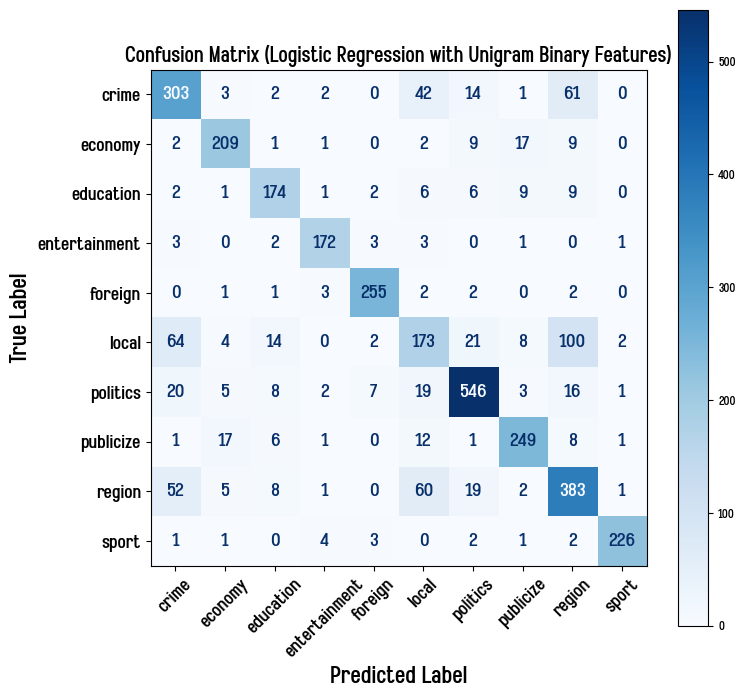

In [20]:
model_unigram_binary = train_predict(X_unigram_binary, show_confusion_matrix=True, 
                                    confusion_matrix_title='Confusion Matrix (Logistic Regression with Unigram Binary Features)',
                                    save_plot=True, plot_path='logistic-regression-unigram-binary',
                                    save_model=True, model_path='logistic-regression-unigram-binary')

               precision    recall  f1-score   support

        crime       0.69      0.76      0.73       428
      economy       0.83      0.83      0.83       250
    education       0.83      0.87      0.85       210
entertainment       0.93      0.94      0.94       185
      foreign       0.94      0.96      0.95       266
        local       0.64      0.40      0.49       388
     politics       0.89      0.88      0.88       627
    publicize       0.88      0.85      0.87       296
       region       0.66      0.79      0.72       531
        sport       0.98      0.96      0.97       240

     accuracy                           0.80      3421
    macro avg       0.83      0.82      0.82      3421
 weighted avg       0.80      0.80      0.80      3421



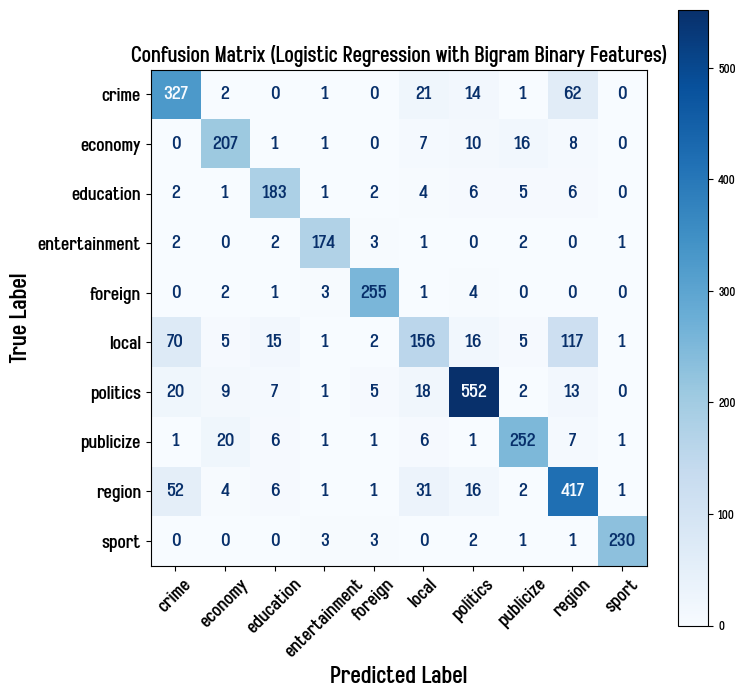

In [21]:
model_bigram_binary = train_predict(X_bigram_binary, show_confusion_matrix=True,
                                    confusion_matrix_title='Confusion Matrix (Logistic Regression with Bigram Binary Features)',
                                    save_plot=True, plot_path='logistic-regression-bigram-binary',
                                    save_model=True, model_path='logistic-regression-bigram-binary')

               precision    recall  f1-score   support

        crime       0.65      0.71      0.68       428
      economy       0.79      0.79      0.79       250
    education       0.83      0.80      0.82       210
entertainment       0.90      0.95      0.92       185
      foreign       0.93      0.93      0.93       266
        local       0.52      0.46      0.49       388
     politics       0.88      0.86      0.87       627
    publicize       0.82      0.80      0.81       296
       region       0.63      0.67      0.65       531
        sport       0.98      0.94      0.96       240

     accuracy                           0.77      3421
    macro avg       0.79      0.79      0.79      3421
 weighted avg       0.77      0.77      0.77      3421



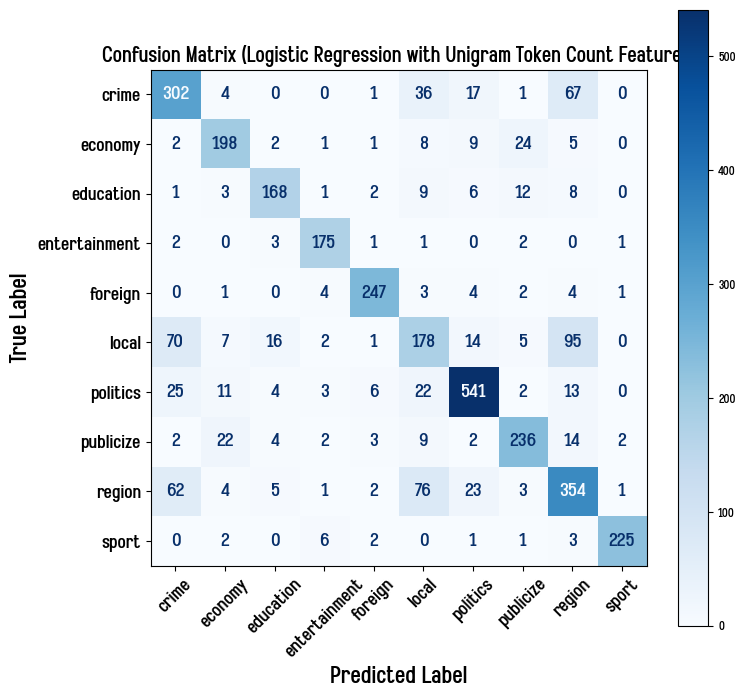

In [22]:
model_unigram_count = train_predict(X_unigram_count, show_confusion_matrix=True,
                                    confusion_matrix_title='Confusion Matrix (Logistic Regression with Unigram Token Count Features)',
                                    save_plot=True, plot_path='logistic-regression-unigram-token-count',
                                    save_model=True, model_path='logistic-regression-unigram-token-count')

               precision    recall  f1-score   support

        crime       0.67      0.74      0.70       428
      economy       0.79      0.80      0.80       250
    education       0.83      0.83      0.83       210
entertainment       0.90      0.94      0.92       185
      foreign       0.93      0.95      0.94       266
        local       0.58      0.42      0.49       388
     politics       0.90      0.87      0.88       627
    publicize       0.83      0.80      0.82       296
       region       0.64      0.75      0.69       531
        sport       0.98      0.97      0.97       240

     accuracy                           0.79      3421
    macro avg       0.81      0.81      0.80      3421
 weighted avg       0.79      0.79      0.78      3421



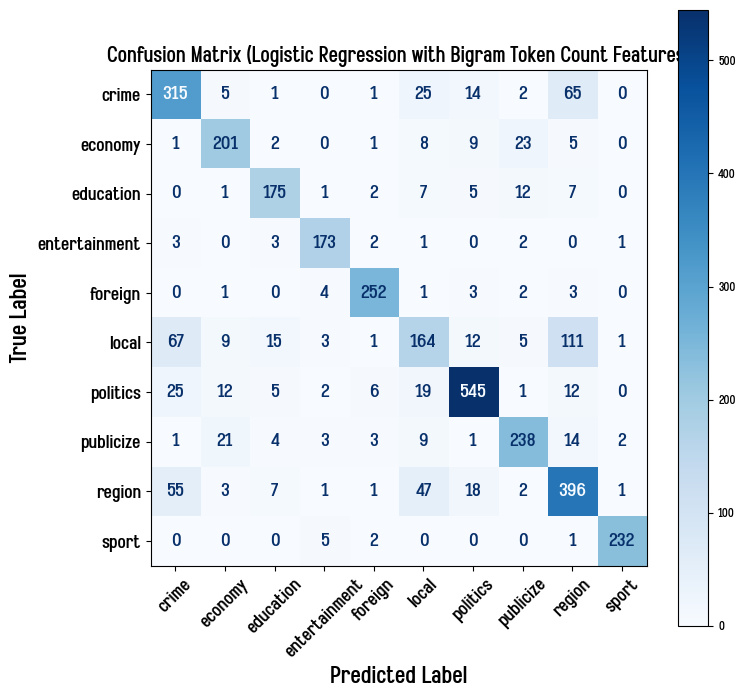

In [23]:
model_bigram_count = train_predict(X_bigram_count, show_confusion_matrix=True,
                                    confusion_matrix_title='Confusion Matrix (Logistic Regression with Bigram Token Count Features)',
                                    save_plot=True, plot_path='logistic-regression-bigram-token-count',
                                    save_model=True, model_path='logistic-regression-bigram-token-count')

## Model Evaluation <a id="eval"></a>
---

| Model                                      | Feature          | Note                         | Macro F1 score |
|--------------------------------------------|------------------|------------------------------|----------------|
| Logistic Regression (Ridge Regularization) | unigram          | binary count (0,1) featurization |      0.81      |
| Logistic Regression (Ridge Regularization) | unigram + bigram | binary count (0,1) featurization |      **0.82**      |
| Logistic Regression (Ridge Regularization) | unigram          | token count featurization        |      0.79      |
| Logistic Regression (Ridge Regularization) | unigram + bigram | token count featurization        |      0.80      |

## Coefficient Analysis <a id="coefana"></a>
---

* coefficients show "for which category, which words are important"
* model is a pipeline of `DictVectorizer` and `LogisticRegression`
* feature names (vocabulary) are in `model.named_steps['dv'].get_feature_names_out()`
* coefficients are in `model.named_steps['logreg'].coef_`, which is (number of class * number of features) array
* class names are in `model.named_steps['logreg'].classes_`

In [24]:
# take a look at coefficients of bigram binary model
# and convert it to dataframe
logreg = model_bigram_binary.named_steps['logreg']
dv = model_bigram_binary.named_steps['dv']

coef_df = pd.DataFrame(logreg.coef_, index=logreg.classes_,  columns=dv.get_feature_names_out())
coef_df


,.,.|remove,0,0.0,0.00,0.0061,0.0061|บาท,0.00|V,0.00|คะแนน,0.01,...,ไฮไลท์|เวที,ไฮไลท์|แจก,ไฮไลท์|แบรนด์,ไฮไลท์|แฟชั่น,ไฮไลท์|โดรน,ไฮไลท์|โฟร์โมสต์,ไ่ม่,ไ่ม่|ดี,ไ่ม่|บังควร,ไ่ม่|หลวงพ่อ
crime,-0.010597,-0.010597,-0.094457,-0.000011,-0.001320,-0.000038,-0.000038,-0.000684,-0.000636,-0.001765,...,-3.107302e-07,-8.310130e-09,-0.000085,-0.000195,-2.554418e-08,-1.711278e-07,-0.000133,-0.000133,-8.310130e-09,-0.000133
economy,0.003190,0.003190,0.055508,0.001668,-0.000332,0.000442,0.000442,-0.000098,-0.000235,0.014806,...,-1.818523e-06,-8.310130e-09,-0.000386,-0.000565,-7.387982e-05,-1.480537e-05,-0.000007,-0.000007,-8.310130e-09,-0.000007
education,-0.017525,-0.017525,0.029714,-0.000037,0.012056,-0.000094,-0.000094,0.006839,0.005217,-0.001682,...,-3.450784e-06,-8.310130e-09,-0.000228,-0.002229,-7.367153e-08,-7.493635e-06,-0.000841,-0.000841,-8.310130e-09,-0.000841
entertainment,-0.002374,-0.002374,-0.089226,-0.000021,-0.000972,-0.000006,-0.000006,-0.000364,-0.000608,-0.001511,...,-7.027476e-08,-8.310130e-09,-0.001515,-0.006977,-3.317077e-08,-3.828915e-05,-0.001231,-0.001231,-8.310130e-09,-0.001231
foreign,-0.004329,-0.004329,-0.052857,-0.000139,-0.001060,-0.000025,-0.000025,-0.000042,-0.001018,-0.005908,...,-4.169391e-03,-8.310130e-09,-0.000234,-0.001146,-1.648660e-06,-6.856654e-07,-0.000018,-0.000018,-8.310130e-09,-0.000018
local,-0.016092,-0.016092,-0.044080,-0.000131,-0.005086,-0.000069,-0.000069,-0.004161,-0.000925,0.000611,...,-4.551796e-07,-8.310130e-09,-0.000376,-0.000891,-3.015644e-07,-5.691870e-06,-0.002032,-0.002032,-8.310130e-09,-0.002032
politics,-0.002594,-0.002594,-0.010587,-0.000068,-0.001680,-0.000031,-0.000031,-0.000976,-0.000704,-0.002500,...,4.189518e-03,-8.310130e-09,-0.000131,-0.000755,-4.154182e-08,-1.989745e-06,-0.000192,-0.000192,7.479117e-08,-0.000192
publicize,0.024156,0.024156,0.111278,-0.001202,-0.000273,-0.000068,-0.000068,-0.000018,-0.000255,-0.011194,...,-9.079582e-07,7.479117e-08,0.003887,0.015127,8.831515e-05,7.723285e-05,-0.000223,-0.000223,-8.310130e-09,-0.000223
region,0.027259,0.027259,-0.066130,-0.000046,-0.000858,-0.000048,-0.000048,-0.000470,-0.000388,-0.000747,...,-1.197353e-05,-8.310130e-09,-0.000124,-0.000511,-1.425844e-07,-1.776945e-06,0.004772,0.004772,-8.310130e-09,0.004772
sport,-0.001094,-0.001094,0.160838,-0.000011,-0.000474,-0.000063,-0.000063,-0.000027,-0.000447,0.009890,...,-1.139406e-06,-8.310130e-09,-0.000808,-0.001859,-1.216860e-05,-6.329349e-06,-0.000096,-0.000096,-8.310130e-09,-0.000096


In [25]:
## top 10 words for each category
category_list = logreg.classes_
for category in category_list:
    print(f'Top 20 words for {category}')
    top10_df = pd.DataFrame(np.round(coef_df.loc[category].sort_values(ascending=False)[:20], 3).reset_index().values, columns=['word', 'coef'])
    for i, row in top10_df.iterrows():
        print(f'{i+1}. {row["word"]}')
    print()
    print()


Top 20 words for crime
1. สน.
2. วันที่
3. คดี
4. ก.
5. ตร.
6. ตำรวจ
7. สอบสวน
8. ต่อว่า
9. แขวง
10. พล.ต.ต.
11. พ.ต.อ.
12. ทนายความ
13. ศาล
14. พิเศษ
15. ผู้สื่อข่าว
16. กล่าวว่า
17. กระทรวงยุติธรรม
18. บช.
19. อายุ
20. ผู้สื่อข่าว|รายงาน


Top 20 words for economy
1. กล่าวว่า
2. 2559
3. คาด
4. ราคา
5. ไทย
6. ลดลง
7. กระทรวงพาณิชย์
8. 2560
9. ให้บริการ
10. บาท
11. ตลาด
12. อธิบดี
13. สถานี
14. มีผล
15. ล.
16. อุตสาหกรรม
17. ผู้ประกอบการ
18. สินค้า
19. ผู้โดยสาร
20. มหาชน


Top 20 words for education
1. มหาวิทยาลัย
2. การศึกษา
3. อธิการบดี
4. ธ.
5. ครู
6. โรงเรียน
7. พระ
8. นักเรียน
9. ศธ
10. กรมศิลปากร
11. นักศึกษา
12. ม.
13. วัฒนธรรม
14. ศึกษา
15. กระทรวงศึกษาธิการ|ธ.
16. ต่อว่า
17. ศ.
18. สถาบัน
19. อุดมศึกษา
20. กระทรวงศึกษาธิการ


Top 20 words for entertainment
1. ขอบคุณ
2. ขอบ|คุณภาพ
3. ขอบ
4. อินสตาแกรม
5. คุณภาพ
6. สาว
7. เจ้าตัว
8. นักร้อง
9. ช่อง
10. ละคร
11. คน
12. มติชน|ออนไลน์
13. งาน
14. เรื่อง
15. มติชน
16. แฟน
17. บอ
18. เพลง
19. หนุ่ม
20. พี่


Top 20 words for foreign

Top words for each category represent its content, and most are overlapping with the word cloud.

In [26]:
# intersect top 200 words of local and region category
local_top200 = coef_df.loc['local'].sort_values(ascending=False)[:200]
region_top200 = coef_df.loc['region'].sort_values(ascending=False)[:200]

local_top200.index.intersection(region_top200.index)

Index(['กล่าวว่า', 'น.', 'ผู้สื่อข่าว', 'บริเวณ', 'น้ำ', 'จ.', 'จำนวนมาก',
       'ชาวบ้าน', 'โดยเฉพาะ', 'อำเภอ', 'โรงพยาบาล', 'รอง', 'ถนน', 'ต.', 'อ.',
       'ทราบ', 'วันที่', 'ประชาชน', 'ตำบล'],
      dtype='object')

## Error Analysis <a id="error"></a>
---

As we observed from the wordclouds, `local` and `region` are usually mispredicted, i.e. `local` news predicted as `region` or `region` news predicted as `local`.

By the way, it is surprising that `crime` news is also usually mispredicted with `local` and `region` news.
This may be because news in local and region categories are usually about crime.

# Summary

---

Using Logistic Regression, I can develop a predictive model that can approximately classify the news into 10 topics with Macro F1-score at 0.82 on the unseen dataset. I suggest that Matichon should reconsider their news label because some news are overlapping in content.